In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Stock/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/HINDALCO.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/BAJAJ-AUTO.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/BAJFINANCE.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/AXISBANK.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/HEROMOTOCO.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/GAIL.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/HDFCBANK.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/BRITANNIA.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/CIPLA.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/GRASIM.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/DRREDDY.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/ASIANPAINT.csv
/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/ADANIPORTS.csv
/content/drive/MyDrive/Stock/input/ni

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/BHARTIARTL.csv',na_values=['null'],
               index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

<ipython-input-17-3534806467ac>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv('/content/drive/MyDrive/Stock/input/nifty50-stock-market-data/BHARTIARTL.csv',na_values=['null'],


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265
2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901
2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN
2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632
2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920


<Axes: xlabel='Date'>

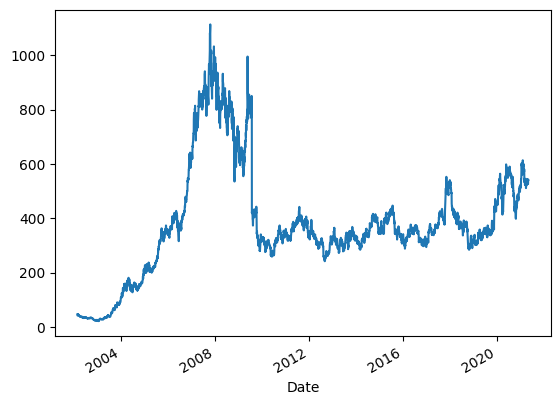

In [ ]:
df["VWAP"].plot()

Set target variables & features

In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df['VWAP'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2002-02-18,0.027678,0.026062,0.021363,0.053130
2002-02-19,0.021612,0.020256,0.019306,0.018087
2002-02-20,0.017523,0.018235,0.018325,0.012751
2002-02-21,0.019545,0.018751,0.020101,0.006723
2002-02-22,0.019366,0.018923,0.019119,0.004019


In [ ]:
feature_transform.shape

(4774, 4)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10) # 90-10%
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4340, 4)
(434, 4)


In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

(4340, 1, 4)
(434, 1, 4)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


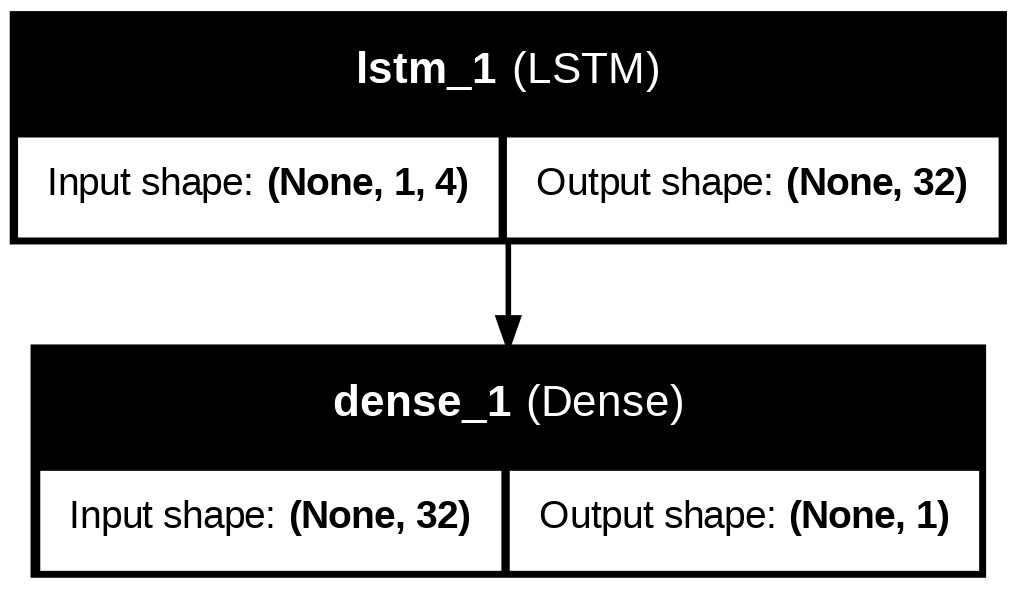

In [ ]:
#Building the LSTM Model
import tensorflow as tf
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
tf.keras.utils.plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 146821.6562
Epoch 2/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 134974.4375
Epoch 3/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 111966.6094
Epoch 4/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 85702.1406
Epoch 5/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 61872.6914
Epoch 6/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 43394.5859
Epoch 7/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 31037.9082
Epoch 8/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 23891.0488
Epoch 9/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 20077.0488
Epoch 10/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 17675.0391
Epoch 11/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 15398.3740
Epoch 12/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12718.2607
Epoch 13/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9777.9385
Epoch 14/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


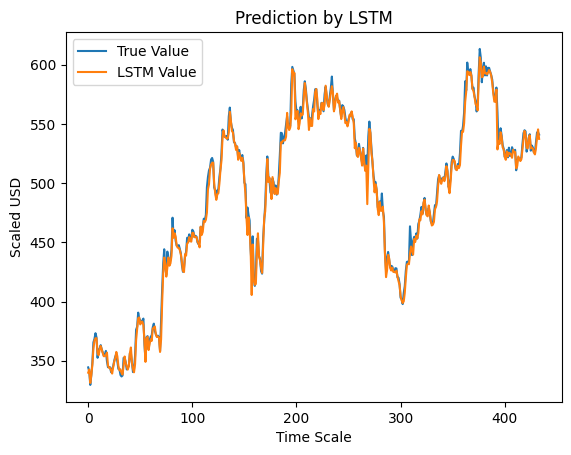

In [ ]:
#Predicted vs True Adj Close Value – LSTM
import matplotlib.pyplot as plt
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()